In [ ]:
#The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes. 
#The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks.


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import backend
import tensorflow as  tf

# Model architecture
from sklearn.model_selection import train_test_split

from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D,MaxPool2D, Activation, MaxPooling2D
#from tensorflow.keras.layers.normalization import BatchNormalization
# 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Data processing

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Progressor
#from tqdm import tqdm
#import h5py


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [48]:
# loading the dataset 
from tensorflow.keras.datasets import cifar10
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()

In [49]:
y_train[0:1]

array([[6]], dtype=uint8)

In [50]:
type(y_train)

numpy.ndarray

In [51]:
#X_train1, X_test1 ,y_train1, y_test1 = train_test_split( X_train, y_train, test_size=0.20 ,stratify=True)
#y_train1, y_test1  = train_test_split( y_train, test_size=0.20 ,stratify=True)
#X, X_valid1, y, y_vaild1 = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
#X, X_valid1, y, y_vaild1 = train_test_split(X_train, test_size=0.2, random_state=1)
#y_train1, y_test1  = train_test_split( y_train, test_size=0.20 ,stratify=y_train)

In [63]:
X_train1, X_test1, y_train1, y_test1= train_test_split(X_train,y_train, test_size=0.2, random_state=1,stratify=y_train)
#y_train1, y_test1  = train_test_split( y_train, test_size=0.20 ,stratify=y_train)

In [53]:
#Now i'am applying stratified sampling as :

#        train,test = train_test_split(dataset,test_size=0.20,stratify=True)
#s = pd.Series(data) 

In [54]:
# X_train and y_train to put into another numpy 3 arrays such ,X_train to spilt into train1 , test1 and val1 .
# checking if after splitting data it has correctly loaded into three arrays or not.


In [55]:
#X_train1= X_train[:40000,:]
#X_test1 = X_train[-10000:,:]
#X_train1= X_train[:40000,:]
#X_test1 = X_train[-10000:,:]

In [56]:
#y_train1= y_train[:40000,:]
#y_test1 = y_train[-10000:,:]

In [64]:
# summarize loaded dataset
print('X_train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('X_train1: X=%s, y=%s' % (X_train1.shape, y_train1.shape))
print('X_test1: X=%s, y=%s' % (X_test1.shape, y_test1.shape))

X_train: X=(50000, 32, 32, 3), y=(50000, 1)
X_train1: X=(40000, 32, 32, 3), y=(40000, 1)
X_test1: X=(10000, 32, 32, 3), y=(10000, 1)


In [58]:
X_test1[0]

array([[[ 57,  63,  67],
        [ 62,  71,  78],
        [ 59,  69,  77],
        ...,
        [ 60,  65,  74],
        [ 63,  69,  73],
        [ 62,  68,  71]],

       [[ 59,  65,  71],
        [ 75,  87,  97],
        [ 70,  84,  94],
        ...,
        [ 66,  74,  83],
        [ 76,  85,  90],
        [ 72,  81,  85]],

       [[ 60,  66,  71],
        [ 74,  86,  97],
        [ 66,  78,  89],
        ...,
        [ 74,  87,  93],
        [ 98, 103, 106],
        [102, 105, 111]],

       ...,

       [[ 58,  65,  67],
        [ 67,  78,  89],
        [ 62,  77,  88],
        ...,
        [ 77,  90,  97],
        [ 66,  78,  83],
        [ 69,  83,  92]],

       [[ 58,  65,  69],
        [ 72,  84,  95],
        [ 68,  82,  93],
        ...,
        [ 65,  82,  91],
        [ 66,  78,  85],
        [ 91, 104, 114]],

       [[ 56,  65,  69],
        [ 69,  80,  87],
        [ 63,  75,  82],
        ...,
        [ 64,  77,  83],
        [ 67,  79,  85],
        [ 71,  82,  89]]

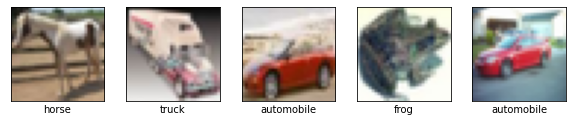

In [59]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train1[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[y_train1[i][0]])
plt.show()

In [60]:
y_test[0:2]

array([[3],
       [8]], dtype=uint8)

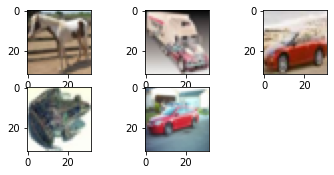

In [46]:
# plot first few images
for i in range(5):
# define subplot
   plt.subplot(330 + 1 + i)
# plot raw pixel data
   plt.imshow(X_train1[i])
# show the figure
plt.show()

In [ ]:
# normalize pixel values
#X_train1, X_test1 = X_train1 / 255.0, X_test1 / 255.0
# Function to reshape and scaling image
def Scale_Reshape(x):
    x_min = x.min(axis=(1, 2), keepdims=True)
    x_max = x.max(axis=(1, 2), keepdims=True)

    x = (x - x_min)/(x_max-x_min)
    
    x = x.reshape(-1, 32, 32, 3)
    return x

In [ ]:
# Training data processing
X_train1_scale = Scale_Reshape(X_train1)

# Test data processing 
X_test1_scale = Scale_Reshape(X_test1)
#  actual test data scaling
# Test data processing 
X_test_scale = Scale_Reshape(X_test)

Text(0.5, 0, 'Classes')

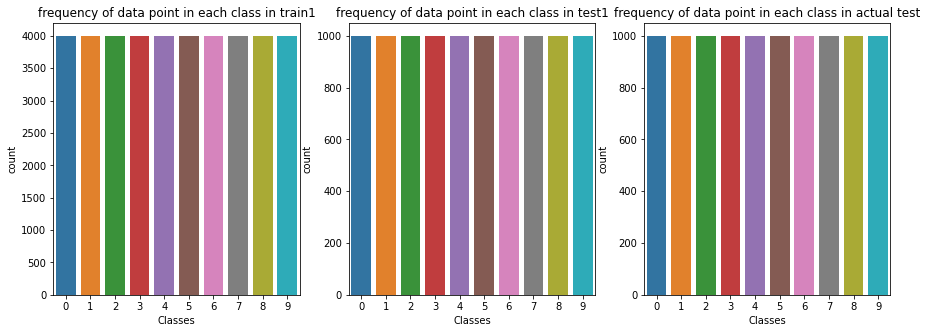

In [65]:
# Show the histogram showing the frequency of data point in each class
# it shows in training set each class having 5k images  and test each class having 1k 
fig, axs = plt.subplots(1,3,figsize=(15,5)) 
# Count plot for training set
sns.countplot(y_train1.ravel(), ax=axs[0])
axs[0].set_title('frequency of data point in each class in train1')
axs[0].set_xlabel('Classes')

sns.countplot(y_test1.ravel(), ax=axs[1])
axs[1].set_title('frequency of data point in each class in test1')
axs[1].set_xlabel('Classes')

sns.countplot(y_test.ravel(), ax=axs[2])
axs[2].set_title('frequency of data point in each class in actual test')
axs[2].set_xlabel('Classes')

Text(0.5, 0, 'Classes')

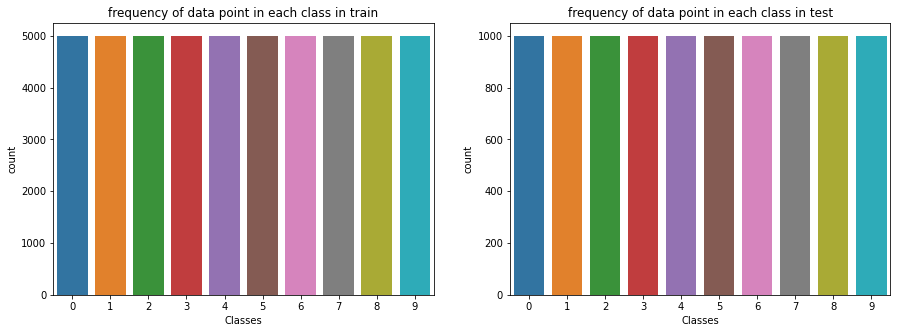

In [66]:
# it shows in training set each class having 5k images  and test each class having 1k 
fig, axs = plt.subplots(1,2,figsize=(15,5)) 
# Count plot for training set
sns.countplot(y_train.ravel(), ax=axs[0])
axs[0].set_title('frequency of data point in each class in train')
axs[0].set_xlabel('Classes')

sns.countplot(y_test.ravel(), ax=axs[1])
axs[1].set_title('frequency of data point in each class in test')
axs[1].set_xlabel('Classes')



In [67]:
# normalize pixel values
X_train1, X_test1 = X_train1 / 255.0, X_test1 / 255.0

In [68]:
# Convert categorical values int one hot encoding .
#import keras
num_classes = 10
y_train1 = tf.keras.utils.to_categorical(y_train1, num_classes)
y_test1 = tf.keras.utils.to_categorical(y_test1, num_classes)

In [69]:
# now we will check with actuall test set for accuracy ( X_test and y_test)
# here one hot encoding for actual test data and scaling for actual test set 
# normalize pixel values
X_test=  X_test / 255.0
# Convert categorical values int one hot encoding .
#import keras
num_classes = 10
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [70]:
y_test1[0:4]

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [71]:
#net is learning with 32 convolutional filters, each of which with a 3 x 3 size. 
#activation is relu and we have a max-pooling operation with pool size 2 x 2 and a dropout at 25%.

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
#model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.25))


In [72]:
#net is learning 128 convolutional filters, each of which with a 3 x 3 size.  
#folowed by another 128 convolutional filters, each of which with a 3 x 3 size and activation is also relu. 
#After that we have a avarage -pooling operation with pool size 2 x 2 and a dropout at 25%.

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.AveragePooling2D((2, 2)))
model.add(Dropout(0.50))


In [73]:
# Add Dense layers on top
# CIFAR has 10 output classes, so you use a final Dense layer with 10 outputs,drop out  and a softmax activation.

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation = 'softmax'))

In [74]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 128)       36992     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 128)       147584    
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 128)         0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 5, 5, 128)        

In [75]:
number_of_round=20 ,
#batch_size = 32

In [76]:
# Compile and train the model and validation dataset and without any image augmentation
model.compile(optimizer='adam',
#              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

#history = model.fit(X_train1, y_train1, epochs = 40, shuffle = True, batch_size = 64,
#                    validation_data=(X_test1, y_test1))
history = model.fit(X_train1, y_train1, epochs = 40, shuffle = True, batch_size = 64,
                     validation_split = 0.1)

Epoch 1/40
563/563 [==============================] - 8s 14ms/step - loss: 1.6360 - accuracy: 0.3943 - val_loss: 1.3654 - val_accuracy: 0.5045
Epoch 2/40
563/563 [==============================] - 8s 14ms/step - loss: 1.3005 - accuracy: 0.5331 - val_loss: 1.1572 - val_accuracy: 0.5857
Epoch 3/40
563/563 [==============================] - 8s 14ms/step - loss: 1.1539 - accuracy: 0.5855 - val_loss: 1.1006 - val_accuracy: 0.6118
Epoch 4/40
563/563 [==============================] - 8s 14ms/step - loss: 1.0541 - accuracy: 0.6238 - val_loss: 1.0411 - val_accuracy: 0.6300
Epoch 5/40
563/563 [==============================] - 8s 14ms/step - loss: 0.9605 - accuracy: 0.6596 - val_loss: 0.8930 - val_accuracy: 0.6817
Epoch 6/40
563/563 [==============================] - 8s 14ms/step - loss: 0.8861 - accuracy: 0.6869 - val_loss: 0.9096 - val_accuracy: 0.6798
Epoch 7/40
563/563 [==============================] - 8s 14ms/step - loss: 0.8131 - accuracy: 0.7134 - val_loss: 0.8379 - val_accuracy: 0.7080

In [ ]:
# Compile and train the model and validation dataset and without any image augmentation
model.compile(optimizer='adam',
#              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train1, y_train1, epochs = 40, shuffle = True, batch_size = 64,
                   validation_data=(X_test1, y_test1))

Epoch 1/40
625/625 [==============================] - 10s 16ms/step - loss: 0.2948 - accuracy: 0.9121 - val_loss: 0.9311 - val_accuracy: 0.7537
Epoch 2/40
625/625 [==============================] - 9s 15ms/step - loss: 0.2482 - accuracy: 0.9188 - val_loss: 0.9602 - val_accuracy: 0.7496
Epoch 3/40
625/625 [==============================] - 9s 15ms/step - loss: 0.2266 - accuracy: 0.9247 - val_loss: 0.9800 - val_accuracy: 0.7564
Epoch 4/40
625/625 [==============================] - 9s 15ms/step - loss: 0.2208 - accuracy: 0.9259 - val_loss: 1.0445 - val_accuracy: 0.7484
Epoch 5/40
625/625 [==============================] - 9s 15ms/step - loss: 0.2086 - accuracy: 0.9297 - val_loss: 1.0114 - val_accuracy: 0.7574
Epoch 6/40
625/625 [==============================] - 9s 15ms/step - loss: 0.1964 - accuracy: 0.9331 - val_loss: 0.9851 - val_accuracy: 0.7594
Epoch 7/40
625/625 [==============================] - 9s 15ms/step - loss: 0.2003 - accuracy: 0.9328 - val_loss: 1.0587 - val_accuracy: 0.753

In [36]:
# Evaluate the model
test_loss1, test_acc1 = model.evaluate(X_test1,  y_test1, verbose=2)

313/313 - 2s - loss: 1.3974 - accuracy: 0.7678


In [37]:
predicted_classes = model.predict_classes(X_test1) 
predicted_classes

array([1, 8, 5, ..., 9, 1, 1])

In [77]:
# plotting model train and test accuracy 
def plotmodel(hist): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['Train1', 'Test1'], loc='upper left')
    # loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['Train1', 'Test1'], loc='upper left')
    plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


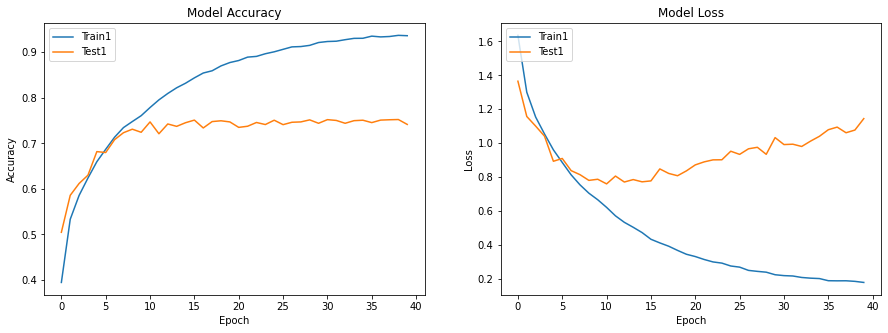

In [78]:
# printing , below graph shows overfitting train accuracy good but test accuracy down ,difference is there 
print(history.history.keys())

plotmodel(history)

In [ ]:
# MODEL Training using data augmentaion 

In [ ]:
# generating more data using the existing data
#Randomly Zoom by 10% some training images
#Randomly shift images horizontally by 10% of the width
#Randomly shift images vertically by 10% of the height
#Randomly flip images horizontally.
#from tf.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zca_epsilon=0,
                            #width_shift_range = 0.1,
                            horizontal_flip = True,
                            fill_mode='reflect',
                            )
    
#datagen.fit(X_train1)



In [ ]:
test_generator = ImageDataGenerator(zca_epsilon=0,
                               horizontal_flip=True,
                               fill_mode='reflect',)
#test_generator.fit(X_test1, seed=0, augment=True)

In [ ]:
# retraining the model

#history = model.fit_generator(datagen.flow(X_train1, y_train1, batch_size = 32), epochs = 10, validation_data=(X_test1, y_test1))
#                                    workers=4)
# get batch iterator for training
train_iterator = datagen.flow(X_train1, y_train1)
# get batch iterator for test1
val_iterator = datagen.flow(X_test1, y_test1)
# fit model
history = model.fit_generator(train_iterator, validation_data=val_iterator, epochs = 20)

Epoch 1/20
1250/1250 [==============================] - 94s 75ms/step - loss: 0.4797 - acc: 0.8342 - val_loss: 0.7343 - val_acc: 0.7748
Epoch 2/20
1250/1250 [==============================] - 94s 75ms/step - loss: 0.4741 - acc: 0.8362 - val_loss: 0.7378 - val_acc: 0.7768
Epoch 3/20
1250/1250 [==============================] - 97s 78ms/step - loss: 0.4629 - acc: 0.8400 - val_loss: 0.7027 - val_acc: 0.7777
Epoch 4/20
1250/1250 [==============================] - 109s 87ms/step - loss: 0.4516 - acc: 0.8438 - val_loss: 0.7374 - val_acc: 0.7757
Epoch 5/20
1250/1250 [==============================] - 110s 88ms/step - loss: 0.4483 - acc: 0.8442 - val_loss: 0.7154 - val_acc: 0.7766
Epoch 6/20
1250/1250 [==============================] - 102s 82ms/step - loss: 0.4428 - acc: 0.8458 - val_loss: 0.7637 - val_acc: 0.7689
Epoch 7/20
1250/1250 [==============================] - 97s 78ms/step - loss: 0.4296 - acc: 0.8508 - val_loss: 0.7611 - val_acc: 0.7764
Epoch 8/20
1250/1250 [=======================

In [ ]:
# Evaluate the model for test data
#test_loss, test_acc = model.evaluate(X_test1,  y_test1, verbose=2)
# get batch iterator for testing
test_iterator = datagen.flow(X_test, y_test)
# evaluate model loss on test dataset
test_loss, test_acc = model.evaluate_generator(test_iterator, verbose=2)

313/313 - 5s - loss: 0.7641 - acc: 0.7682


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


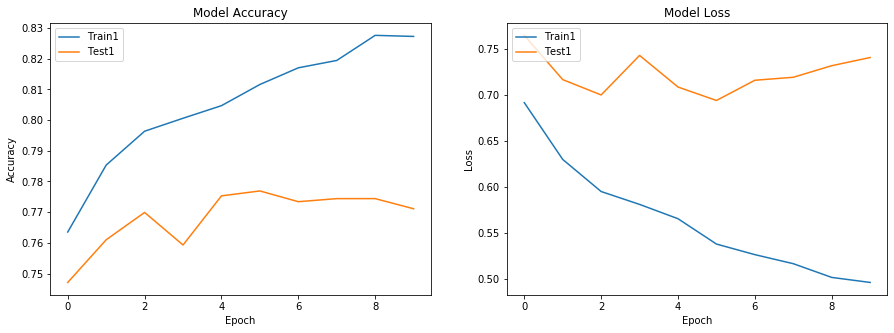

In [ ]:
# printing , below graph shows overfitting train accuracy good but test accuracy down ,difference is there 
print(history.history.keys())

plotmodel(history)